In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdatuneq

In [4]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=25
ecc0=3.0 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0.0 #math.pi/6. #math.pi/6.
mass0_1=20.0
mass0_2=3.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.0
3.0
(array([3.14159265, 0.        ]), 0.0, 25, 3.0, array([20.,  3.]))


In [5]:
import getxyuvtwouneq_apper #unequal mass version

In [6]:
useperihelion=True

In [7]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 25 [3.14159265 0.        ] 3.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 25
pi
zero
[-25.  25.]
[0. 0.]
hyperbola
(array([20.,  3.]), array([[-6.52173913,  0.        ,  0.        , -0.        , -0.17693035,
         0.        ],
       [43.47826087,  0.        ,  0.        , -0.        ,  1.17953565,
         0.        ]]), array([[ 0.0012, -0.    ,  0.    ],
       [-0.008 , -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[20.  3.] [[-6.52173913  0.          0.         -0.         -0.17693035  0.        ]
 [43.47826087  0.          0.         -0.          1.17953565  0.        ]] 0.0
[20.  3.] [[-6.52173913  0.          0.         -0.         -0.17693035  0.        ]
 [43.47826087  0.          0.         -0.          1.17953565  0.        ]] 0.0


In [12]:
print(xyuvaequneq)

(array([20.,  3.]), array([[-6.52173913,  0.        ,  0.        , -0.        , -0.17693035,
         0.        ],
       [43.47826087,  0.        ,  0.        , -0.        ,  1.17953565,
         0.        ]]), array([[ 0.0012, -0.    ,  0.    ],
       [-0.008 , -0.    ,  0.    ]]))


In [13]:
import timestepAdaptive

In [14]:
import parabfns

In [15]:
import ellipsefns

In [16]:
import hyperbfns

In [17]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-1.79999986e-07  1.76930344e-03  0.00000000e+00]
[3.23999951e-14 3.13043465e-06 0.00000000e+00]
3.130434680608704e-06
0.0017693034450338653
84.779126170259 False
0.027309562539954372
[-1.6701753e-06  4.8318892e-03  0.0000000e+00]
[2.78948552e-12 2.33471533e-05 0.00000000e+00]
2.3347156077982487e-05
0.004831889493560722
31.043756319323816 False
0.0580164056885042
[-8.65606278e-06  1.02648479e-02  0.00000000e+00]
[7.49274229e-11 1.05367103e-04 0.00000000e+00]
0.00010536717833939166
0.01026485159850797
14.612973072285135 False
0.10208877080311665
[-3.04372634e-05  1.80624977e-02  0.00000000e+00]
[9.26427003e-10 3.26253822e-04 0.00000000e+00]
0.00032625474808563223
0.01806252330339347
8.304487555834402 False
0.1559727372318006
[-8.07343136e-05  2.75958330e-02  0.00000000e+00]
[6.51802939e-09 7.61530001e-04 0.00000000e+00]
0.0007615365188574639
0.027595951131596533
5.435579998119888 False
0.21433972848839367
[-0.00017356  0.0379216   0.        ]
[3.01244107e-08 1.43804778e-03 0.000000

1.5315090052598046 False
0.6270543492819557
[-0.02527632  0.09462818  0.        ]
[0.00063889 0.00895449 0.        ]
0.009593385904202004
0.09794583147945606
1.531458743412293 False
0.627803914560615
[-0.02536663  0.09460735  0.        ]
[0.00064347 0.00895055 0.        ]
0.009594016671036168
0.09794905140447338
1.5314083990521363 False
0.6285492100968532
[-0.0254555   0.09458681  0.        ]
[0.00064798 0.00894667 0.        ]
0.009594648217754336
0.09795227520458286
1.531357997419768 False
0.6292902125103829
[-0.02554297  0.09456657  0.        ]
[0.00065244 0.00894284 0.        ]
0.009595280242956073
0.097955501340946
1.531307562583002 False
0.6300269009527993
[-0.02562906  0.09454662  0.        ]
[0.00065685 0.00893906 0.        ]
0.009595912459315526
0.09795872834676615
1.5312571174771874 False
0.6307592570067528
[-0.02571379  0.09452696  0.        ]
[0.0006612  0.00893535 0.        ]
0.00959654459310216
0.09796195482483064
1.5312066839439913 False
0.6314872645880409
[-0.02579719  0

0.09821489706466197
1.5272632205809282 False
0.6876312354495698
[-0.03033848  0.09341313  0.        ]
[0.00092042 0.00872601 0.        ]
0.009646437081398411
0.09821627706952861
1.5272417615036762 False
0.6879787963107221
[-0.03035748  0.0934084   0.        ]
[0.00092158 0.00872513 0.        ]
0.009646705659515012
0.09821764433906473
1.527220501055527 False
0.6883241373164503
[-0.03037627  0.09340372  0.        ]
[0.00092272 0.00872425 0.        ]
0.009646971765299252
0.0982189990037531
1.5271994371910496 False
0.6886672770763733
[-0.03039485  0.09339908  0.        ]
[0.00092385 0.00872339 0.        ]
0.009647235424071372
0.09822034119301039
1.5271785678817655 False
0.6890082340375102
[-0.03041322  0.0933945   0.        ]
[0.00092496 0.00872253 0.        ]
0.009647496660946409
0.09822167103519676
1.527157891115994 False
0.6893470264849475
[-0.03043139  0.09338997  0.        ]
[0.00092607 0.00872169 0.        ]
0.009647755500825453
0.09822298865757167
1.52713740489953 False
0.6896836725

0.717388910077904
[-0.03166136  0.09308023  0.        ]
[0.00100244 0.00866393 0.        ]
0.009666371138449092
0.098317705111791
1.5256662045706237 False
0.7175663256985573
[-0.03166754  0.09307866  0.        ]
[0.00100283 0.00866364 0.        ]
0.009666469998576805
0.09831820786902498
1.5256584029666522 False
0.7177428676350261
[-0.03167366  0.0930771   0.        ]
[0.00100322 0.00866335 0.        ]
0.009666568124100933
0.09831870688786001
1.5256506594526964 False
0.7179185420500189
[-0.03167974  0.09307556  0.        ]
[0.00100361 0.00866306 0.        ]
0.009666665521949993
0.09831920220358785
1.5256429734793577 False
0.7180933550515414
[-0.03168578  0.09307402  0.        ]
[0.00100399 0.00866277 0.        ]
0.009666762198974357
0.09831969385110166
1.5256353445034578 False
0.7182673126934698
[-0.03169176  0.0930725   0.        ]
[0.00100437 0.00866249 0.        ]
0.009666858161954195
0.09832018186493653
1.5256277719874092 False
0.7184404209760541
[-0.0316977   0.09307099  0.        

1.5250844724719088 False
0.7322978452292991
[-0.03211664  0.09296406  0.        ]
[0.00103148 0.00864232 0.        ]
0.009673795583402176
0.09835545528033601
1.5250806330209643 False
0.7324086539635881
[-0.03211956  0.09296332  0.        ]
[0.00103167 0.00864218 0.        ]
0.009673843996204917
0.09835570139145426
1.5250768168791982 False
0.7325190212268671
[-0.03212245  0.09296257  0.        ]
[0.00103185 0.00864204 0.        ]
0.00967389211599446
0.09835594601240161
1.5250730238626005 False
0.7326289495906414
[-0.03212533  0.09296184  0.        ]
[0.00103204 0.0086419  0.        ]
0.00967393994507513
0.09835618915490336
1.5250692537890183 False
0.732738441607015
[-0.03212819  0.0929611   0.        ]
[0.00103222 0.00864177 0.        ]
0.009673987485729046
0.09835643083057176
1.525065506478058 False
0.7328474998088695
[-0.03213103  0.09296038  0.        ]
[0.0010324  0.00864163 0.        ]
0.009674034740215904
0.09835667105090484
1.5250617817511023 False
0.7329561267100463
[-0.03213386

0.7430336235324994
[-0.03236835  0.09289945  0.        ]
[0.00104771 0.00863031 0.        ]
0.009678016788707815
0.09837691186811982
1.524748003892255 False
0.7431055323120388
[-0.03236983  0.09289906  0.        ]
[0.00104781 0.00863024 0.        ]
0.009678041859054775
0.09837703928790892
1.5247460290100012 False
0.7431772074062507
[-0.0323713   0.09289869  0.        ]
[0.0010479  0.00863017 0.        ]
0.00967806680547195
0.0983771660776623
1.5247440638977634 False
0.7432486499364819
[-0.03237277  0.09289831  0.        ]
[0.001048  0.0086301 0.       ]
0.009678091628768919
0.09837729224149706
1.5247421084916553 False
0.7433198610169741
[-0.03237423  0.09289793  0.        ]
[0.00104809 0.00863003 0.        ]
0.009678116329739878
0.0983774177834521
1.5247401627290043 False
0.7433908417550049
[-0.03237568  0.09289756  0.        ]
[0.00104818 0.00862996 0.        ]
0.009678140909176328
0.09837754270755256
1.5247382265473512 False
0.7434615932509058
[-0.03237712  0.09289719  0.        ]
[0

0.7502599694200743
[-0.03250394  0.09286451  0.        ]
[0.00105651 0.00862382 0.        ]
0.00968032304662495
0.09838863271041502
1.524566363692557 False
0.7503102301402036
[-0.03250479  0.09286429  0.        ]
[0.00105656 0.00862378 0.        ]
0.009680337580994335
0.09838870657242291
1.5245652191757044 False
0.7503603534003453
[-0.03250564  0.09286407  0.        ]
[0.00105662 0.00862374 0.        ]
0.009680352054920668
0.09838878012721099
1.5245640794210344 False
0.7504103397583982
[-0.03250648  0.09286385  0.        ]
[0.00105667 0.0086237  0.        ]
0.009680366468741975
0.09838885337649776
1.5245629444018973 False
0.7504601897692139
[-0.03250732  0.09286364  0.        ]
[0.00105673 0.00862365 0.        ]
0.009680380822782227
0.09838892632193029
1.5245618140927504 False
0.7505099039847315
[-0.03250816  0.09286342  0.        ]
[0.00105678 0.00862361 0.        ]
0.009680395117375416
0.09838899896520656
1.5245606884672616 False
0.7505594829538775
[-0.03250899  0.09286321  0.       

0.09839569707412474
1.5244569067588396 False
0.7554822598466328
[-0.03258561  0.09284342  0.        ]
[0.00106182 0.0086199  0.        ]
0.009681722342223918
0.09839574351680015
1.5244561872169693 False
0.7555192199411093
[-0.03258614  0.09284328  0.        ]
[0.00106186 0.00861987 0.        ]
0.009681731449013579
0.09839578979312874
1.524455470253006 False
0.7555560930077189
[-0.03258667  0.09284314  0.        ]
[0.00106189 0.00861985 0.        ]
0.00968174052322625
0.09839583590389508
1.5244547558547863 False
0.7555928793514279
[-0.0325872   0.09284301  0.        ]
[0.00106193 0.00861982 0.        ]
0.009681749565020558
0.09839588184990547
1.5244540440098113 False
0.755629579275746
[-0.03258772  0.09284287  0.        ]
[0.00106196 0.0086198  0.        ]
0.009681758574540698
0.09839592763189287
1.5244533347067182 False
0.7556661930828662
[-0.03258824  0.09284274  0.        ]
[0.00106199 0.00861977 0.        ]
0.009681767551946401
0.09839597325066916
1.524452627932921 False
0.755702721

0.09840027114862986
1.5243860433415952 False
0.7593714960203558
[-0.03263776  0.09282993  0.        ]
[0.00106522 0.0086174  0.        ]
0.009682619469271361
0.09840030218079293
1.5243855626012395 False
0.759399850810944
[-0.03263811  0.09282984  0.        ]
[0.00106525 0.00861738 0.        ]
0.009682625557234717
0.09840033311546621
1.524385083371466 False
0.7594281469738448
[-0.03263846  0.09282975  0.        ]
[0.00106527 0.00861736 0.        ]
0.009682631626089382
0.09840036395303313
1.5243846056463324 False
0.7594563846898118
[-0.03263881  0.09282966  0.        ]
[0.00106529 0.00861735 0.        ]
0.009682637675921691
0.09840039469393246
1.5243841294190383 False
0.7594845641387935
[-0.03263916  0.09282957  0.        ]
[0.00106532 0.00861733 0.        ]
0.00968264370680411
0.09840042533853251
1.5243836546838754 False
0.7595126855000681
[-0.03263951  0.09282948  0.        ]
[0.00106534 0.00861731 0.        ]
0.009682649718817831
0.09840045588724593
1.524383181434448 False
0.759540748

0.7624008006177265
[-0.03267333  0.09282072  0.        ]
[0.00106755 0.00861569 0.        ]
0.009683232976551102
0.09840341953687942
1.5243372710618386 False
0.7624232301348852
[-0.03267357  0.09282066  0.        ]
[0.00106756 0.00861567 0.        ]
0.009683237241686423
0.09840344120855948
1.524336935352546 False
0.7624456183329935
[-0.03267382  0.0928206   0.        ]
[0.00106758 0.00861566 0.        ]
0.009683241494906026
0.09840346281968956
1.5243366005813617 False
0.7624679653256733
[-0.03267407  0.09282053  0.        ]
[0.00106759 0.00861565 0.        ]
0.009683245736254072
0.09840348437049408
1.524336266744808 False
0.7624902712261317
[-0.03267431  0.09282047  0.        ]
[0.00106761 0.00861564 0.        ]
0.009683249965776441
0.09840350586120619
1.5243359338392717 False
0.7625125361471446
[-0.03267456  0.09282041  0.        ]
[0.00106763 0.00861563 0.        ]
0.009683254183512815
0.09840352729202757
1.524335601861628 False
0.7625347602011177
[-0.0326748   0.09282034  0.        

0.09840564332176324
1.5243028238689054 False
0.7648443335367067
[-0.03269884  0.09281411  0.        ]
[0.00106921 0.00861446 0.        ]
0.00968367373903177
0.098405659080318
1.524302579769026 False
0.7648624831412609
[-0.03269902  0.09281407  0.        ]
[0.00106923 0.00861445 0.        ]
0.009683676832692941
0.09840567479923575
1.5243023362832013 False
0.7648806026317783
[-0.0326992   0.09281402  0.        ]
[0.00106924 0.00861444 0.        ]
0.009683679918568803
0.09840569047859378
1.5243020934102336 False
0.7648986920829766
[-0.03269938  0.09281397  0.        ]
[0.00106925 0.00861443 0.        ]
0.009683682996699786
0.09840570611859754
1.52430185114694 False
0.7649167515691851
[-0.03269955  0.09281393  0.        ]
[0.00106926 0.00861443 0.        ]
0.009683686067096374
0.09840572171930032
1.5243016094924946 False
0.7649347811646408
[-0.03269973  0.09281388  0.        ]
[0.00106927 0.00861442 0.        ]
0.009683689129796363
0.09840573728089416
1.5243013684439215 False
0.76495278094

0.09840729616962796
1.5242772216954317 False
0.7668414010605753
[-0.0327176   0.09280925  0.        ]
[0.00107044 0.00861356 0.        ]
0.009683998258673415
0.09840730795359365
1.5242770391680274 False
0.7668563857372078
[-0.03271774  0.09280921  0.        ]
[0.00107045 0.00861355 0.        ]
0.009684000572627447
0.09840731971061628
1.5242768570580003 False
0.7668713478015361
[-0.03271787  0.09280918  0.        ]
[0.00107046 0.00861354 0.        ]
0.00968400288129601
0.09840733144078245
1.5242766753640091 False
0.766886287304551
[-0.03271801  0.09280914  0.        ]
[0.00107047 0.00861354 0.        ]
0.009684005184686687
0.0984073431441307
1.524276494085456 False
0.766901204297174
[-0.03271814  0.09280911  0.        ]
[0.00107048 0.00861353 0.        ]
0.00968400748282661
0.09840735482079889
1.524276313220206 False
0.7669160988300644
[-0.03271827  0.09280908  0.        ]
[0.00107049 0.00861352 0.        ]
0.009684009775724136
0.0984073664708295
1.5242761327676002 False
0.7669309709538

0.09840852034885338
1.5242582600394494 False
0.7684660351129624
[-0.0327315   0.09280565  0.        ]
[0.00107135 0.00861289 0.        ]
0.009684238667520818
0.09840852944496639
1.5242581191489648 False
0.7684786668411265
[-0.0327316   0.09280562  0.        ]
[0.00107136 0.00861288 0.        ]
0.009684240454032163
0.09840853852198071
1.5242579785543275 False
0.7684912810558854
[-0.0327317   0.09280559  0.        ]
[0.00107136 0.00861288 0.        ]
0.009684242236799132
0.09840854757996956
1.5242578382544034 False
0.7685038777935154
[-0.0327318   0.09280557  0.        ]
[0.00107137 0.00861287 0.        ]
0.009684244015827612
0.09840855661896282
1.524257698248729 False
0.7685164570902379
[-0.03273191  0.09280554  0.        ]
[0.00107138 0.00861287 0.        ]
0.009684245791127201
0.0984085656390093
1.5242575585365485 False
0.7685290189821834
[-0.03273201  0.09280551  0.        ]
[0.00107138 0.00861286 0.        ]
0.009684247562709991
0.09840857464017042
1.5242574191169105 False
0.7685415

0.0984094747748575
1.5242434769941815 False
0.7698446653737142
[-0.03274232  0.09280284  0.        ]
[0.00107206 0.00861237 0.        ]
0.009684426135904636
0.09840948194104385
1.5242433659986496 False
0.7698554569124089
[-0.0327424   0.09280282  0.        ]
[0.00107207 0.00861236 0.        ]
0.009684427543607304
0.09840948909331511
1.5242432552186616 False
0.7698662346141621
[-0.03274248  0.09280279  0.        ]
[0.00107207 0.00861236 0.        ]
0.009684428948581467
0.09840949623172282
1.5242431446534193 False
0.7698769985055043
[-0.03274257  0.09280277  0.        ]
[0.00107208 0.00861235 0.        ]
0.00968443035083386
0.0984095033563012
1.524243034302392 False
0.7698877486129002
[-0.03274265  0.09280275  0.        ]
[0.00107208 0.00861235 0.        ]
0.009684431750368892
0.0984095104670727
1.5242429241652329 False
0.7698984849627738
[-0.03274273  0.09280273  0.        ]
[0.00107209 0.00861235 0.        ]
0.009684433147197177
0.09840951756409122
1.5242428142411064 False
0.7699092075

0.771019814928086
[-0.03275086  0.09280062  0.        ]
[0.00107262 0.00861196 0.        ]
0.009684573987803846
0.09841023314576511
1.5242317308386029 False
0.7710291515392131
[-0.03275092  0.0928006   0.        ]
[0.00107262 0.00861195 0.        ]
0.00968457511855748
0.09841023889086684
1.5242316418553177 False
0.7710384770102666
[-0.03275099  0.09280059  0.        ]
[0.00107263 0.00861195 0.        ]
0.009684576247275842
0.09841024462562747
1.5242315530322113 False
0.7710477913610961
[-0.03275105  0.09280057  0.        ]
[0.00107263 0.00861195 0.        ]
0.009684577373960276
0.09841025035005387
1.524231464369178 False
0.771057094611539
[-0.03275112  0.09280055  0.        ]
[0.00107264 0.00861194 0.        ]
0.009684578498613525
0.09841025606415993
1.5242313758660013 False
0.7710663867814068
[-0.03275118  0.09280054  0.        ]
[0.00107264 0.00861194 0.        ]
0.009684579621243607
0.09841026176798641
1.524231287522051 False
0.771075667890433
[-0.03275125  0.09280052  0.        ]
[

0.09841085498190634
1.5242220995598377 False
0.7720740213857962
[-0.03275798  0.09279877  0.        ]
[0.00107308 0.00861161 0.        ]
0.009684697295482136
0.09841085964202394
1.5242220273822928 False
0.7720821419641842
[-0.03275803  0.09279876  0.        ]
[0.00107309 0.00861161 0.        ]
0.009684698211146292
0.09841086429427541
1.5242219553265883 False
0.7720902535030812
[-0.03275808  0.09279875  0.        ]
[0.00107309 0.00861161 0.        ]
0.009684699125276202
0.09841086893873158
1.5242218833916268 False
0.7720983560174907
[-0.03275813  0.09279873  0.        ]
[0.0010731 0.0086116 0.       ]
0.009684700037873393
0.09841087357540015
1.5242218115772892 False
0.7721064495224018
[-0.03275819  0.09279872  0.        ]
[0.0010731 0.0086116 0.       ]
0.009684700948925422
0.09841087820421796
1.5242217398845537 False
0.7721145340329291
[-0.03275824  0.0927987   0.        ]
[0.0010731 0.0086116 0.       ]
0.00968470185845538
0.0984108828253023
1.5242216683116034 False
0.7721226095639574

1.5242142351044758 False
0.7729879213667809
[-0.03276373  0.09279728  0.        ]
[0.00107346 0.00861133 0.        ]
0.009684797072545397
0.09841136658204375
1.5242141757573069 False
0.7729950560845634
[-0.03276378  0.09279727  0.        ]
[0.00107347 0.00861133 0.        ]
0.009684797825523485
0.09841137040770992
1.5242141165046557 False
0.7730021833557337
[-0.03276382  0.09279726  0.        ]
[0.00107347 0.00861133 0.        ]
0.009684798577320845
0.09841137422737702
1.5242140573449239 False
0.773009303191865
[-0.03276386  0.09279724  0.        ]
[0.00107347 0.00861133 0.        ]
0.009684799327937154
0.09841137804104337
1.5242139982781373 False
0.7730164156045352
[-0.03276391  0.09279723  0.        ]
[0.00107347 0.00861133 0.        ]
0.00968480007736495
0.0984113818486711
1.5242139393048826 False
0.7730235206053966
[-0.03276395  0.09279722  0.        ]
[0.00107348 0.00861132 0.        ]
0.009684800825613989
0.09841138565030974
1.5242138804243925 False
0.7730306182060052
[-0.0327639

0.09841178270963645
1.5242077307203585 False
0.7737939992304037
[-0.0327685   0.09279604  0.        ]
[0.00107377 0.00861111 0.        ]
0.009684879603646192
0.098411785898063
1.524207681337814 False
0.7738003171279749
[-0.03276853  0.09279603  0.        ]
[0.00107378 0.0086111  0.        ]
0.009684880230282801
0.09841178908181072
1.5242076320277387 False
0.7738066288187211
[-0.03276857  0.09279602  0.        ]
[0.00107378 0.0086111  0.        ]
0.009684880855980052
0.09841179226078577
1.5242075827915862 False
0.7738129343118716
[-0.0327686   0.09279601  0.        ]
[0.00107378 0.0086111  0.        ]
0.009684881480749268
0.09841179543504563
1.5242075336284655 False
0.7738192336165433
[-0.03276864  0.092796    0.        ]
[0.00107378 0.0086111  0.        ]
0.009684882104597881
0.0984117986046281
1.524207484537792 False
0.7738255267417792
[-0.03276868  0.09279599  0.        ]
[0.00107379 0.0086111  0.        ]
0.009684882727522317
0.09841180176951501
1.5242074355198467 False
0.7738318136

0.7745102563031492
[-0.03277248  0.09279501  0.        ]
[0.00107404 0.00861091 0.        ]
0.009684948642591326
0.09841213666307284
1.5242022486875284 False
0.7745158899061181
[-0.03277251  0.092795    0.        ]
[0.00107404 0.00861091 0.        ]
0.00968494916960701
0.09841213934066778
1.5242022072170731 False
0.7745215182817741
[-0.03277254  0.09279499  0.        ]
[0.00107404 0.00861091 0.        ]
0.009684949695884536
0.09841214201451229
1.5242021658047067 False
0.7745271414373819
[-0.03277257  0.09279498  0.        ]
[0.00107404 0.00861091 0.        ]
0.009684950221422342
0.09841214468459847
1.524202124450551 False
0.7745327593802221
[-0.0327726   0.09279498  0.        ]
[0.00107404 0.00861091 0.        ]
0.009684950746227406
0.09841214735096174
1.5242020831540581 False
0.7745383721175062
[-0.03277263  0.09279497  0.        ]
[0.00107405 0.00861091 0.        ]
0.009684951270299107
0.09841215001359896
1.524202041915276 False
0.7745439796564517
[-0.03277266  0.09279496  0.        

0.09841243530651238
1.5241976233269154 False
0.7751610061241737
[-0.0327759   0.09279412  0.        ]
[0.00107426 0.00861075 0.        ]
0.00968500786978808
0.09841243757670105
1.524197588166561 False
0.7751660519072002
[-0.03277592  0.09279411  0.        ]
[0.00107426 0.00861075 0.        ]
0.009685008316034993
0.09841243984392925
1.5241975530520597 False
0.7751710932584688
[-0.03277595  0.09279411  0.        ]
[0.00107426 0.00861075 0.        ]
0.009685008761680911
0.09841244210810395
1.5241975179848521 False
0.7751761301839055
[-0.03277597  0.0927941   0.        ]
[0.00107426 0.00861074 0.        ]
0.009685009206745374
0.09841244436932442
1.5241974829634009 False
0.7751811626892412
[-0.032776    0.09279409  0.        ]
[0.00107427 0.00861074 0.        ]
0.009685009651218147
0.09841244662753866
1.5241974479885112 False
0.7751861907803095
[-0.03277602  0.09279409  0.        ]
[0.00107427 0.00861074 0.        ]
0.009685010095095809
0.0984124488827293
1.524197413060452 False
0.775191214

0.09841268763953823
1.524193715239376 False
0.7757364153844976
[-0.03277876  0.09279338  0.        ]
[0.00107445 0.00861061 0.        ]
0.009685057471036236
0.09841268958338775
1.5241936851334696 False
0.7757409682997004
[-0.03277878  0.09279337  0.        ]
[0.00107445 0.00861061 0.        ]
0.00968505785315277
0.09841269152478642
1.5241936550655226 False
0.7757455174158193
[-0.0327788   0.09279336  0.        ]
[0.00107445 0.00861061 0.        ]
0.009685058234791568
0.09841269346375786
1.524193625035169 False
0.7757500627375704
[-0.03277882  0.09279336  0.        ]
[0.00107445 0.00861061 0.        ]
0.009685058615953564
0.09841269540030678
1.5241935950423364 False
0.7757546042696608
[-0.03277885  0.09279335  0.        ]
[0.00107445 0.00861061 0.        ]
0.009685058996627586
0.09841269733437645
1.5241935650879028 False
0.7757591420169095
[-0.03277887  0.09279335  0.        ]
[0.00107445 0.00861061 0.        ]
0.009685059376826042
0.0984126992660299
1.5241935351708924 False
0.775763675

1.5241903564349422 False
0.7762569115161901
[-0.03278122  0.09279274  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685100103821098
0.09841290618522094
1.524190330460194 False
0.7762610403578462
[-0.03278124  0.09279273  0.        ]
[0.00107461 0.00861049 0.        ]
0.00968510043352851
0.09841290786034376
1.5241903045163818 False
0.7762651659181884
[-0.03278125  0.09279273  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685100762843719
0.09841290953347391
1.5241902786034325 False
0.7762692882010938
[-0.03278127  0.09279272  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685101091764244
0.09841291120459877
1.5241902527215412 False
0.7762734072104642
[-0.03278129  0.09279272  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685101420282328
0.09841291287367897
1.5241902268713179 False
0.7762775229502796
[-0.03278131  0.09279271  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685101748414724
0.09841291454079959
1.524190201051445 False
0.776281635424352
[-0.03278133

0.7767337539470748
[-0.03278336  0.09279218  0.        ]
[0.00107475 0.00861039 0.        ]
0.00968513730060784
0.09841309516831508
1.5241874035508818 False
0.7767375124314612
[-0.03278338  0.09279217  0.        ]
[0.00107475 0.00861039 0.        ]
0.00968513758673469
0.0984130966220182
1.5241873810364395 False
0.7767412680656375
[-0.0327834   0.09279217  0.        ]
[0.00107475 0.00861039 0.        ]
0.009685137872536324
0.098413098074069
1.5241873585475885 False
0.7767450208528226
[-0.03278341  0.09279217  0.        ]
[0.00107475 0.00861039 0.        ]
0.009685138158004983
0.09841309952442806
1.5241873360849392 False
0.7767487707963132
[-0.03278343  0.09279216  0.        ]
[0.00107475 0.00861039 0.        ]
0.009685138443152148
0.09841310097315371
1.524187313647588 False
0.776752517899291
[-0.03278345  0.09279216  0.        ]
[0.00107475 0.00861038 0.        ]
0.009685138727970995
0.09841310242021128
1.5241872912360723 False
0.7767562621650062
[-0.03278346  0.09279215  0.        ]
[0

0.09841326095678292
1.5241848358817296 False
0.7771755999781391
[-0.03278526  0.09279169  0.        ]
[0.00107487 0.0086103  0.        ]
0.009685170181768383
0.098413262225009
1.5241848162399565 False
0.7771790307844852
[-0.03278527  0.09279168  0.        ]
[0.00107487 0.0086103  0.        ]
0.00968517043111738
0.0984132634918555
1.5241847966195503 False
0.7771824591048632
[-0.03278529  0.09279168  0.        ]
[0.00107488 0.0086103  0.        ]
0.009685170680195775
0.09841326475732717
1.5241847770204375 False
0.7771858849419543
[-0.0327853   0.09279167  0.        ]
[0.00107488 0.00861029 0.        ]
0.009685170928999223
0.09841326602140192
1.5241847574429601 False
0.7771893082984836
[-0.03278532  0.09279167  0.        ]
[0.00107488 0.00861029 0.        ]
0.009685171177535793
0.09841326728412075
1.524184737886483 False
0.7771927291770953
[-0.03278533  0.09279167  0.        ]
[0.00107488 0.00861029 0.        ]
0.009685171425801139
0.09841326854546159
1.5241847183513484 False
0.7771961475

1.524182658389067 False
0.7775639661517606
[-0.03278685  0.09279127  0.        ]
[0.00107498 0.00861022 0.        ]
0.00968519782519954
0.09841340267056892
1.5241826410790118 False
0.7775671212561833
[-0.03278687  0.09279127  0.        ]
[0.00107498 0.00861022 0.        ]
0.009685198044950948
0.09841340378703985
1.5241826237876108 False
0.7775702741680822
[-0.03278688  0.09279126  0.        ]
[0.00107498 0.00861022 0.        ]
0.00968519826449601
0.09841340490246239
1.5241826065124473 False
0.7775734248895015
[-0.03278689  0.09279126  0.        ]
[0.00107498 0.00861022 0.        ]
0.009685198483783838
0.09841340601657804
1.524182589257525 False
0.7775765734229959
[-0.03278691  0.09279126  0.        ]
[0.00107498 0.00861022 0.        ]
0.00968519870285756
0.09841340712960588
1.5241825720194504 False
0.7775797197706875
[-0.03278692  0.09279125  0.        ]
[0.00107498 0.00861022 0.        ]
0.009685198921708492
0.09841340824150178
1.524182554798907 False
0.7775828639347858
[-0.03278693  

0.7779275396729695
[-0.03278829  0.0927909   0.        ]
[0.00107507 0.00861015 0.        ]
0.009685222638644651
0.09841352873789584
1.524180688607296 False
0.7779304471210285
[-0.0327883  0.0927909  0.       ]
[0.00107507 0.00861015 0.        ]
0.00968522283292974
0.0984135297249811
1.5241806733198016 False
0.7779333526292911
[-0.03278831  0.09279089  0.        ]
[0.00107507 0.00861015 0.        ]
0.009685223027014103
0.09841353071104655
1.5241806580481017 False
0.7779362561997504
[-0.03278832  0.09279089  0.        ]
[0.00107507 0.00861015 0.        ]
0.009685223220898674
0.09841353169609693
1.5241806427921232 False
0.7779391578343909
[-0.03278833  0.09279089  0.        ]
[0.00107507 0.00861015 0.        ]
0.009685223414594931
0.09841353268019054
1.5241806275509626 False
0.7779420575350815
[-0.03278834  0.09279088  0.        ]
[0.00107508 0.00861015 0.        ]
0.009685223608094191
0.09841353366328327
1.5241806123253037 False
0.7779449553037785
[-0.03278835  0.09279088  0.        ]
[

0.7782604183153723
[-0.03278954  0.09279057  0.        ]
[0.00107515 0.00861009 0.        ]
0.009685244454831593
0.09841363957720288
1.5241789719841525 False
0.7782631078758117
[-0.03278955  0.09279057  0.        ]
[0.00107515 0.00861009 0.        ]
0.009685244627595168
0.0984136404549449
1.5241789583901435 False
0.7782657957102258
[-0.03278956  0.09279057  0.        ]
[0.00107516 0.00861009 0.        ]
0.009685244800180712
0.09841364133178242
1.524178944810143 False
0.7782684818203851
[-0.03278957  0.09279056  0.        ]
[0.00107516 0.00861009 0.        ]
0.009685244972599705
0.09841364220777374
1.524178931243248 False
0.7782711662079446
[-0.03278958  0.09279056  0.        ]
[0.00107516 0.00861009 0.        ]
0.009685245144863627
0.0984136430829772
1.5241789176885556 False
0.7782738488744441
[-0.03278959  0.09279056  0.        ]
[0.00107516 0.00861009 0.        ]
0.009685245316951384
0.09841364395728563
1.524178904147725 False
0.7782765298216352
[-0.0327896   0.09279056  0.        ]


0.7785662994525591
[-0.03279066  0.09279028  0.        ]
[0.00107523 0.00861004 0.        ]
0.009685263741943622
0.09841373756718938
1.5241774543680089 False
0.7785687962658544
[-0.03279067  0.09279028  0.        ]
[0.00107523 0.00861004 0.        ]
0.009685263896388817
0.09841373835186232
1.5241774422154293 False
0.7785712915352296
[-0.03279068  0.09279028  0.        ]
[0.00107523 0.00861004 0.        ]
0.00968526405068984
0.09841373913580279
1.5241774300741937 False
0.7785737852621186
[-0.03279068  0.09279028  0.        ]
[0.00107523 0.00861004 0.        ]
0.00968526420484856
0.09841373991902025
1.524177417944156 False
0.7785762774479366
[-0.03279069  0.09279027  0.        ]
[0.00107523 0.00861003 0.        ]
0.00968526435885536
0.09841374070146587
1.5241774058260722 False
0.778578768094195
[-0.0327907   0.09279027  0.        ]
[0.00107523 0.00861003 0.        ]
0.009685264512719853
0.09841374148318849
1.5241773937191863 False
0.7785812572023092
[-0.03279071  0.09279027  0.        ]


0.7788506347451986
[-0.03279165  0.09279002  0.        ]
[0.00107529 0.00860999 0.        ]
0.009685281018601223
0.09841382534279025
1.5241760949493355 False
0.7788529588048907
[-0.03279166  0.09279002  0.        ]
[0.00107529 0.00860999 0.        ]
0.009685281157211957
0.09841382604701414
1.5241760840427256 False
0.7788552814781959
[-0.03279167  0.09279002  0.        ]
[0.00107529 0.00860999 0.        ]
0.009685281295721385
0.09841382675072333
1.5241760731440872 False
0.7788576027661203
[-0.03279168  0.09279002  0.        ]
[0.00107529 0.00860999 0.        ]
0.009685281434096927
0.09841382745375228
1.524176062255984 False
0.778859922669997
[-0.03279169  0.09279001  0.        ]
[0.00107529 0.00860999 0.        ]
0.009685281572350999
0.0984138281561641
1.5241760513774385 False
0.778862241191035
[-0.03279169  0.09279001  0.        ]
[0.0010753  0.00860999 0.        ]
0.009685281710483594
0.09841382885795875
1.524176040508452 False
0.7788645583304427
[-0.0327917   0.09279001  0.        ]


0.0984139042752199
1.5241748724907482 False
0.7791177910747062
[-0.03279256  0.09278979  0.        ]
[0.00107535 0.00860994 0.        ]
0.009685296679589738
0.09841390490977248
1.5241748626631828 False
0.7791199584531872
[-0.03279257  0.09278979  0.        ]
[0.00107535 0.00860994 0.        ]
0.009685296804382341
0.09841390554379163
1.5241748528438788 False
0.7791221245828485
[-0.03279257  0.09278978  0.        ]
[0.00107535 0.00860994 0.        ]
0.009685296929071819
0.09841390617728685
1.5241748430326894 False
0.7791242894647166
[-0.03279258  0.09278978  0.        ]
[0.00107535 0.00860994 0.        ]
0.00968529705363614
0.0984139068101462
1.5241748332313478 False
0.7791264531000397
[-0.03279259  0.09278978  0.        ]
[0.00107535 0.00860994 0.        ]
0.009685297178108815
0.09841390744253992
1.524174823437218 False
0.7791286154897289
[-0.03279259  0.09278978  0.        ]
[0.00107535 0.00860994 0.        ]
0.009685297302468745
0.09841390807436083
1.5241748136519595 False
0.779130776

0.779371278037128
[-0.03279339  0.09278957  0.        ]
[0.00107541 0.0086099  0.        ]
0.009685311027500802
0.09841397780549672
1.5241737336992593 False
0.7793733017992783
[-0.03279339  0.09278957  0.        ]
[0.00107541 0.0086099  0.        ]
0.009685311140053854
0.09841397837733142
1.5241737248430438 False
0.779375324434543
[-0.0327934   0.09278957  0.        ]
[0.00107541 0.0086099  0.        ]
0.009685311252503197
0.0984139789486392
1.5241737159949886 False
0.7793773459439567
[-0.03279341  0.09278957  0.        ]
[0.00107541 0.0086099  0.        ]
0.009685311364848834
0.09841397951942008
1.524173707155094 False
0.7793793663285535
[-0.03279341  0.09278957  0.        ]
[0.00107541 0.0086099  0.        ]
0.00968531147711279
0.09841398008978598
1.5241736983216263 False
0.7793813855891464
[-0.03279342  0.09278956  0.        ]
[0.00107541 0.0086099  0.        ]
0.009685311589285452
0.09841398065968804
1.5241736894953424 False
0.7793834037266448
[-0.03279342  0.09278956  0.        ]


0.7796120217796877
[-0.03279415  0.09278938  0.        ]
[0.00107546 0.00860987 0.        ]
0.00968532419309183
0.09841404469430078
1.5241726977682748 False
0.7796139136973984
[-0.03279415  0.09278937  0.        ]
[0.00107546 0.00860987 0.        ]
0.00968532429477061
0.09841404521088751
1.5241726897677157 False
0.7796158045966268
[-0.03279416  0.09278937  0.        ]
[0.00107546 0.00860987 0.        ]
0.009685324396370227
0.09841404572707205
1.5241726817733856 False
0.7796176944781622
[-0.03279416  0.09278937  0.        ]
[0.00107546 0.00860987 0.        ]
0.009685324497891619
0.09841404624285915
1.5241726737852106 False
0.7796195833427841
[-0.03279417  0.09278937  0.        ]
[0.00107546 0.00860987 0.        ]
0.009685324599332915
0.09841404675823932
1.524172665803338 False
0.7796214711912911
[-0.03279417  0.09278937  0.        ]
[0.00107546 0.00860987 0.        ]
0.009685324700685437
0.09841404727316846
1.524172657828451 False
0.7796233580245688
[-0.03279418  0.09278937  0.        ]

0.09841410382065255
1.5241717820583554 False
0.7798337785916861
[-0.03279482  0.0927892   0.        ]
[0.0010755  0.00860984 0.        ]
0.009685335923231038
0.09841410429014247
1.5241717747872097 False
0.7798355529878049
[-0.03279483  0.0927892   0.        ]
[0.0010755  0.00860984 0.        ]
0.009685336015544324
0.09841410475914682
1.5241717675235844 False
0.7798373264588586
[-0.03279483  0.0927892   0.        ]
[0.0010755  0.00860984 0.        ]
0.009685336107805163
0.0984141052278847
1.5241717602640859 False
0.7798390990053689
[-0.03279484  0.0927892   0.        ]
[0.0010755  0.00860983 0.        ]
0.009685336199981912
0.09841410569619537
1.5241717530112038 False
0.7798408706281758
[-0.03279484  0.09278919  0.        ]
[0.0010755  0.00860983 0.        ]
0.009685336292097531
0.09841410616419544
1.5241717457631323 False
0.7798426413278883
[-0.03279485  0.09278919  0.        ]
[0.0010755  0.00860983 0.        ]
0.009685336384127193
0.09841410663175881
1.5241717385218239 False
0.779844

1.5241709355356179 False
0.780043633294764
[-0.03279544  0.09278904  0.        ]
[0.00107554 0.00860981 0.        ]
0.00968534667335549
0.09841415890691486
1.5241709289196654 False
0.7800452999431676
[-0.03279545  0.09278904  0.        ]
[0.00107554 0.00860981 0.        ]
0.009685346757363204
0.09841415933372191
1.524170922309571 False
0.7800469657493964
[-0.03279545  0.09278904  0.        ]
[0.00107554 0.00860981 0.        ]
0.009685346841307955
0.09841415976020908
1.5241709157044305 False
0.7800486307140787
[-0.03279546  0.09278903  0.        ]
[0.00107554 0.0086098  0.        ]
0.009685346925191601
0.09841416018638578
1.5241709091040985 False
0.7800502948378243
[-0.03279546  0.09278903  0.        ]
[0.00107554 0.0086098  0.        ]
0.009685347009023765
0.09841416061230093
1.5241709025078172 False
0.7800519581211462
[-0.03279547  0.09278903  0.        ]
[0.00107554 0.0086098  0.        ]
0.009685347092772797
0.09841416103779373
1.5241708959180773 False
0.7800536205648759
[-0.0327954

0.009685356085426021
0.0984142067255842
1.5241701883373036 False
0.780234649403608
[-0.03279599  0.0927889   0.        ]
[0.00107558 0.00860978 0.        ]
0.009685356162380206
0.0984142071165551
1.5241701822822205 False
0.7802362209075752
[-0.03279599  0.09278889  0.        ]
[0.00107558 0.00860978 0.        ]
0.009685356239268661
0.09841420750719208
1.524170176232309 False
0.7802377916404551
[-0.032796    0.09278889  0.        ]
[0.00107558 0.00860978 0.        ]
0.009685356316110621
0.09841420789759282
1.5241701701860564 False
0.7802393616027116
[-0.032796    0.09278889  0.        ]
[0.00107558 0.00860978 0.        ]
0.009685356392895538
0.09841420828770375
1.5241701641442922 False
0.7802409307949143
[-0.03279601  0.09278889  0.        ]
[0.00107558 0.00860978 0.        ]
0.009685356469624344
0.0984142086775296
1.5241701581069431 False
0.7802424992176235
[-0.03279601  0.09278889  0.        ]
[0.00107558 0.00860978 0.        ]
0.009685356546297035
0.09841420906707037
1.52417015207400

0.09841425058017043
1.524169509148542 False
0.7804134257525134
[-0.03279649  0.09278877  0.        ]
[0.00107561 0.00860976 0.        ]
0.009685364787916845
0.09841425093916452
1.5241695035886986 False
0.7804149107393386
[-0.03279649  0.09278877  0.        ]
[0.00107561 0.00860975 0.        ]
0.009685364858530016
0.09841425129791932
1.5241694980325609 False
0.7804163950177657
[-0.0327965   0.09278876  0.        ]
[0.00107561 0.00860975 0.        ]
0.009685364929101685
0.09841425165646328
1.5241694924796887 False
0.7804178785882091
[-0.0327965   0.09278876  0.        ]
[0.00107561 0.00860975 0.        ]
0.00968536499960516
0.09841425201466075
1.5241694869321827 False
0.7804193614513514
[-0.0327965   0.09278876  0.        ]
[0.00107561 0.00860975 0.        ]
0.00968536507006713
0.09841425237264738
1.524169481387942 False
0.7804208436076066
[-0.03279651  0.09278876  0.        ]
[0.00107561 0.00860975 0.        ]
0.009685365140464634
0.09841425273030648
1.524169475848774 False
0.7804223250

0.7805853005171466
[-0.03279695  0.09278865  0.        ]
[0.00107564 0.00860973 0.        ]
0.00968537284773767
0.09841429188759969
1.5241688694088968 False
0.780586704633939
[-0.03279696  0.09278864  0.        ]
[0.00107564 0.00860973 0.        ]
0.00968537291263898
0.09841429221733487
1.5241688643021987 False
0.7805881080994207
[-0.03279696  0.09278864  0.        ]
[0.00107564 0.00860973 0.        ]
0.009685372977500982
0.09841429254687035
1.5241688591985931 False
0.7805895109139842
[-0.03279696  0.09278864  0.        ]
[0.00107564 0.00860973 0.        ]
0.009685373042312496
0.09841429287614932
1.5241688540989604 False
0.7805909130781348
[-0.03279697  0.09278864  0.        ]
[0.00107564 0.00860973 0.        ]
0.009685373107082838
0.09841429320521912
1.524168849002567 False
0.7805923145922836
[-0.03279697  0.09278864  0.        ]
[0.00107564 0.00860973 0.        ]
0.00968537317180828
0.0984142935340608
1.524168843909707 False
0.7805937154568795
[-0.03279698  0.09278864  0.        ]
[0

0.7807492677923644
[-0.03279738  0.09278853  0.        ]
[0.00107567 0.00860971 0.        ]
0.009685380324208813
0.09841432987227426
1.5241682811301516 False
0.7807505968681095
[-0.03279739  0.09278853  0.        ]
[0.00107567 0.00860971 0.        ]
0.009685380383953064
0.09841433017580857
1.524168276429237 False
0.7807519253441088
[-0.03279739  0.09278853  0.        ]
[0.00107567 0.00860971 0.        ]
0.009685380443679737
0.09841433047925356
1.5241682717297056 False
0.7807532532205362
[-0.03279739  0.09278853  0.        ]
[0.00107567 0.00860971 0.        ]
0.009685380503346637
0.09841433078239488
1.5241682670348775 False
0.7807545804979912
[-0.0327974   0.09278853  0.        ]
[0.00107567 0.00860971 0.        ]
0.009685380562976725
0.09841433108534918
1.5241682623429456 False
0.7807559071768414
[-0.0327974   0.09278853  0.        ]
[0.00107567 0.00860971 0.        ]
0.009685380622571866
0.09841433138812591
1.5241682576537638 False
0.780757233257436
[-0.03279741  0.09278853  0.       

0.7809071042493492
[-0.03279779  0.09278843  0.        ]
[0.00107569 0.00860969 0.        ]
0.009685387325185184
0.09841436544115491
1.5241677302658603 False
0.7809083630348674
[-0.03279779  0.09278843  0.        ]
[0.0010757  0.00860969 0.        ]
0.009685387380255126
0.09841436572094099
1.5241677259327437 False
0.7809096212673952
[-0.03279779  0.09278843  0.        ]
[0.0010757  0.00860969 0.        ]
0.009685387435280201
0.09841436600049915
1.524167721603157 False
0.7809108789473818
[-0.0327978   0.09278843  0.        ]
[0.0010757  0.00860969 0.        ]
0.009685387490264144
0.09841436627984831
1.524167717276807 False
0.7809121360752391
[-0.0327978   0.09278842  0.        ]
[0.0010757  0.00860969 0.        ]
0.009685387545217495
0.09841436655904205
1.5241677129528646 False
0.7809133926512729
[-0.0327978   0.09278842  0.        ]
[0.0010757  0.00860969 0.        ]
0.009685387600147083
0.09841436683811507
1.5241677086307914 False
0.78091464867572
[-0.03279781  0.09278842  0.        ]

0.7810590871302527
[-0.03279817  0.09278833  0.        ]
[0.00107572 0.00860967 0.        ]
0.009685393884988975
0.09841439876862011
1.5241672141153007 False
0.7810602800353632
[-0.03279817  0.09278833  0.        ]
[0.00107572 0.00860967 0.        ]
0.009685393935775397
0.09841439902664344
1.524167210119232 False
0.7810614724303478
[-0.03279817  0.09278833  0.        ]
[0.00107572 0.00860967 0.        ]
0.00968539398652318
0.09841439928447046
1.5241672061262037 False
0.781062664315594
[-0.03279818  0.09278833  0.        ]
[0.00107572 0.00860967 0.        ]
0.009685394037242874
0.09841439954215478
1.5241672021353854 False
0.7810638556913824
[-0.03279818  0.09278833  0.        ]
[0.00107572 0.00860967 0.        ]
0.009685394087930746
0.09841439979967742
1.524167198147071 False
0.7810650465580314
[-0.03279818  0.09278833  0.        ]
[0.00107572 0.00860967 0.        ]
0.00968539413858371
0.0984144000570227
1.5241671941615034 False
0.7810662369158906
[-0.03279818  0.09278833  0.        ]
[

1.524166744971473 False
0.7812020837221241
[-0.03279851  0.09278824  0.        ]
[0.00107574 0.00860966 0.        ]
0.009685399894386068
0.09841442929970212
1.5241667412733146 False
0.7812032162575042
[-0.03279852  0.09278824  0.        ]
[0.00107574 0.00860966 0.        ]
0.009685399941346495
0.09841442953828719
1.5241667375782932 False
0.7812043483210598
[-0.03279852  0.09278824  0.        ]
[0.00107574 0.00860966 0.        ]
0.009685399988283194
0.09841442977675172
1.5241667338851386 False
0.781205479913028
[-0.03279852  0.09278824  0.        ]
[0.00107574 0.00860966 0.        ]
0.0096854000351943
0.09841443001508621
1.524166730193998 False
0.781206611033665
[-0.03279852  0.09278824  0.        ]
[0.00107574 0.00860966 0.        ]
0.009685400082053125
0.09841443025315508
1.5241667265069712 False
0.7812077416834957
[-0.03279853  0.09278824  0.        ]
[0.00107574 0.00860966 0.        ]
0.009685400128911182
0.09841443049122005
1.5241667228200046 False
0.7812088718625259
[-0.03279853  

0.7813346995988885
[-0.03279883  0.09278816  0.        ]
[0.00107576 0.00860964 0.        ]
0.009685405326730226
0.09841445689902589
1.5241663138364043 False
0.781335777547118
[-0.03279883  0.09278816  0.        ]
[0.00107576 0.00860964 0.        ]
0.009685405370340237
0.09841445712058892
1.5241663104050092 False
0.7813368550570738
[-0.03279883  0.09278816  0.        ]
[0.00107576 0.00860964 0.        ]
0.00968540541391101
0.09841445734195262
1.524166306976701 False
0.7813379321291496
[-0.03279884  0.09278816  0.        ]
[0.00107576 0.00860964 0.        ]
0.00968540545745683
0.09841445756318952
1.5241663035503565 False
0.7813390087635952
[-0.03279884  0.09278816  0.        ]
[0.00107576 0.00860964 0.        ]
0.009685405500973961
0.09841445778428067
1.5241663001262693 False
0.7813400849606981
[-0.03279884  0.09278815  0.        ]
[0.00107576 0.00860964 0.        ]
0.009685405544464268
0.09841445800523553
1.5241662967042928 False
0.7813411607207269
[-0.03279884  0.09278815  0.        ]

0.7814609980108692
[-0.03279912  0.09278808  0.        ]
[0.00107578 0.00860963 0.        ]
0.009685410374406204
0.09841448254401486
1.5241659166669301 False
0.7814620252247072
[-0.03279912  0.09278808  0.        ]
[0.00107578 0.00860963 0.        ]
0.009685410414959504
0.09841448275004805
1.5241659134760503 False
0.7814630520308922
[-0.03279912  0.09278808  0.        ]
[0.00107578 0.00860963 0.        ]
0.009685410455477935
0.09841448295590408
1.5241659102879146 False
0.7814640784297743
[-0.03279913  0.09278808  0.        ]
[0.00107578 0.00860963 0.        ]
0.009685410495976996
0.09841448316166171
1.5241659071013027 False
0.7814651044215475
[-0.03279913  0.09278808  0.        ]
[0.00107578 0.00860963 0.        ]
0.009685410536458557
0.09841448336733043
1.5241659039160678 False
0.7814661300063865
[-0.03279913  0.09278808  0.        ]
[0.00107578 0.00860963 0.        ]
0.009685410576912063
0.0984144835728566
1.5241659007330404 False
0.7814671551845728
[-0.03279913  0.09278808  0.      

0.7815814198059584
[-0.03279939  0.09278801  0.        ]
[0.0010758  0.00860962 0.        ]
0.00968541507287123
0.0984145064148128
1.524165546974921 False
0.7815823997841647
[-0.03279939  0.09278801  0.        ]
[0.0010758  0.00860961 0.        ]
0.00968541511064403
0.09841450660671947
1.524165544002823 False
0.7815833793825809
[-0.03279939  0.09278801  0.        ]
[0.0010758  0.00860961 0.        ]
0.0096854151483981
0.09841450679853098
1.524165541032199 False
0.7815843586013949
[-0.0327994   0.09278801  0.        ]
[0.0010758  0.00860961 0.        ]
0.009685415186142122
0.09841450699029143
1.5241655380623658 False
0.7815853374407062
[-0.0327994   0.09278801  0.        ]
[0.0010758  0.00860961 0.        ]
0.009685415223846314
0.09841450718184953
1.5241655350956664 False
0.7815863159009153
[-0.0327994   0.09278801  0.        ]
[0.0010758  0.00860961 0.        ]
0.00968541526154046
0.0984145073733566
1.5241655321297576 False
0.7815872939821223
[-0.0327994   0.09278801  0.        ]
[0.00

0.781696365752617
[-0.03279964  0.09278795  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685419453609548
0.09841452867137833
1.5241652022830259 False
0.7816973016794916
[-0.03279964  0.09278795  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685419488860552
0.09841452885047285
1.5241651995093537 False
0.7816982372518536
[-0.03279965  0.09278794  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685419524098413
0.09841452902950058
1.5241651967367158 False
0.7816991724698344
[-0.03279965  0.09278794  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685419559312586
0.09841452920840797
1.524165193965942 False
0.7817001073336718
[-0.03279965  0.09278794  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685419594504936
0.09841452938720449
1.524165191196885 False
0.7817010418435845
[-0.03279965  0.09278794  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685419629663045
0.09841452956582704
1.5241651884305225 False
0.7817019759999168
[-0.03279966  0.09278794  0.        

0.7818044104380057
[-0.03279988  0.09278789  0.        ]
[0.00107583 0.00860959 0.        ]
0.009685423478682549
0.09841454912096356
1.5241648855763346 False
0.7818053058813543
[-0.03279988  0.09278788  0.        ]
[0.00107583 0.00860959 0.        ]
0.00968542351166558
0.09841454928853548
1.5241648829811165 False
0.7818062009929302
[-0.03279988  0.09278788  0.        ]
[0.00107583 0.00860959 0.        ]
0.00968542354463238
0.09841454945602494
1.5241648803871752 False
0.7818070957728961
[-0.03279988  0.09278788  0.        ]
[0.00107583 0.00860959 0.        ]
0.009685423577593492
0.09841454962348552
1.5241648777936814 False
0.7818079902213082
[-0.03279988  0.09278788  0.        ]
[0.00107583 0.00860959 0.        ]
0.00968542361050486
0.09841454979069335
1.524164875204102 False
0.7818088843386672
[-0.03279988  0.09278788  0.        ]
[0.00107583 0.00860959 0.        ]
0.009685423643421094
0.09841454995792591
1.5241648726141392 False
0.781809778124923
[-0.03279989  0.09278788  0.        ]


[-0.03280009  0.09278783  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685427216495929
0.09841456811110806
1.524164591472403 False
0.7819078306574864
[-0.03280009  0.09278783  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685427247405006
0.09841456826814314
1.5241645890403717 False
0.7819086881879573
[-0.03280009  0.09278783  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685427278315856
0.09841456842518721
1.5241645866082012 False
0.7819095454074376
[-0.0328001   0.09278783  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685427309214201
0.09841456858216775
1.5241645841770146 False
0.7819104023160526
[-0.0328001   0.09278783  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685427340068392
0.09841456873892397
1.5241645817493021 False
0.7819112589142465
[-0.0328001   0.09278783  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685427370934903
0.09841456889574278
1.5241645793206202 False
0.7819121152018941
[-0.0328001   0.09278783  0.        ]
[0.00107585 0.0

0.7820077390272416
[-0.0328003   0.09278778  0.        ]
[0.00107586 0.00860957 0.        ]
0.00968543081009465
0.09841458636855946
1.5241643087159338 False
0.7820085607105146
[-0.0328003   0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685430839086113
0.09841458651585197
1.5241643064347883 False
0.7820093821020518
[-0.0328003   0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685430868039016
0.09841458666294857
1.524164304156677 False
0.7820102032022416
[-0.0328003   0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685430897018515
0.09841458681018031
1.5241643018764728 False
0.7820110240108142
[-0.03280031  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685430925940222
0.09841458695711841
1.524164299600816 False
0.7820118445283524
[-0.03280031  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.0096854309548637
0.09841458710406553
1.5241642973250198 False
0.7820126647548371
[-0.03280031  0.09278777  0.        ]


0.7821035133080132
[-0.03280049  0.09278773  0.        ]
[0.00107587 0.00860956 0.        ]
0.00968543415337228
0.09841460335423946
1.5241640456557137 False
0.7821043013454675
[-0.03280049  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434180592213
0.0984146034925316
1.5241640435139594 False
0.7821050891089625
[-0.03280049  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434207800275
0.09841460363076343
1.524164041373139 False
0.7821058765986172
[-0.0328005   0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434234996468
0.09841460376893496
1.5241640392332525 False
0.7821066638145504
[-0.0328005   0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.00968543426216156
0.09841460390694848
1.5241640370958134 False
0.7821074507570753
[-0.0328005   0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434289334011
0.0984146040449994
1.5241640349577947 False
0.7821082374261168
[-0.0328005   0.09278772  0.        ]


0.7821961612783779
[-0.03280067  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437320480703
0.09841461944488077
1.5241637964571995 False
0.7821969174371769
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437346055103
0.09841461957481268
1.524163794444922 False
0.7821976733385327
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437371621364
0.09841461970470325
1.524163792433285 False
0.7821984289825269
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437397158382
0.09841461983444524
1.524163790423949 False
0.7821991843694538
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.00968543742273132
0.09841461996436973
1.5241637884117865 False
0.78219993949895
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437448232822
0.09841462009393127
1.5241637864052449 False
0.7822006943717359
[-0.03280068  0.09278768  0.        ]
[

0.7822858243380825
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440322786126
0.09841463469823035
1.5241635602260406 False
0.782286550271779
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440346840322
0.09841463482043879
1.5241635583333786 False
0.7822872759632936
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440370890103
0.09841463494262478
1.524163556441064 False
0.7822880014126706
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.00968544039493547
0.09841463506478836
1.5241635545490968 False
0.7822887266199535
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440418957192
0.0984146351868318
1.5241635526589898 False
0.7822894515853804
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.0096854404429534
0.09841463530874561
1.5241635507708908 False
0.7822901763092085
[-0.03280086  0.09278763  0.        ]
[

0.09841464893752291
1.5241633396998173 False
0.7823719381860337
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.009685443148180716
0.09841464905277424
1.5241633379149016 False
0.782372635670851
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.00968544317080344
0.09841464916770998
1.5241633361348734 False
0.782373332927862
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.009685443193467673
0.09841464928285663
1.524163334351579 False
0.7823740299566471
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.00968544321608716
0.09841464939777594
1.5241633325718054 False
0.7823747267576573
[-0.03280102  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.009685443238709691
0.09841464951271071
1.5241633307917923 False
0.7823754233308614
[-0.03280102  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.00968544326131044
0.09841464962753482
1.524163329013493 False
0.782376119676

0.09841466236032975
1.5241631318186986 False
0.7824540385557462
[-0.03280116  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445788897518
0.09841466246905244
1.5241631301348937 False
0.7824547094469193
[-0.03280116  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445810237078
0.098414662577469
1.5241631284558295 False
0.7824553801231734
[-0.03280117  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445831598916
0.09841466268599876
1.5241631267750122 False
0.7824560505842831
[-0.03280117  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445852944563
0.09841466279444624
1.5241631250954693 False
0.7824567208304113
[-0.03280117  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445874293253
0.0984146629029092
1.5241631234156865 False
0.7824573908615268
[-0.03280117  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445895602792
0.09841466301117326
1.5241631217389844 False
0.78245806

1.5241629340458804 False
0.7825336834272358
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448301195183
0.09841467523288985
1.524162932459391 False
0.7825343290141055
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448321366839
0.09841467533537282
1.5241629308722218 False
0.782534974397787
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448341501202
0.09841467543766631
1.524162929287987 False
0.7825356195786561
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448361663436
0.09841467554010142
1.5241629277015591 False
0.7825362645564313
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448381788385
0.09841467564234709
1.524162926118065 False
0.7825369093314883
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448401941198
0.09841467574473432
1.5241629245323784 False
0.7825375539035454
[-0.03280132

0.7826109735176644
[-0.03280145  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.00968545069271453
0.09841468738310624
1.5241627442871788 False
0.7826115950131105
[-0.03280145  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685450711763372
0.09841468747988469
1.5241627427883566 False
0.78261221631665
[-0.03280145  0.09278748  0.        ]
[0.00107594 0.00860952 0.        ]
0.009685450730801619
0.09841468757660932
1.5241627412903682 False
0.7826128374283894
[-0.03280145  0.09278748  0.        ]
[0.00107594 0.00860952 0.        ]
0.009685450749848501
0.0984146876733778
1.5241627397917004 False
0.7826134583482411
[-0.03280145  0.09278748  0.        ]
[0.00107594 0.00860952 0.        ]
0.009685450768859962
0.09841468776996634
1.5241627382958194 False
0.7826140790765623
[-0.03280145  0.09278748  0.        ]
[0.00107594 0.00860952 0.        ]
0.009685450787860823
0.09841468786650102
1.5241627368007726 False
0.7826146996134599
[-0.03280145  0.09278747  0.        ]

0.7826836082695068
[-0.03280157  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452898452603
0.09841469858945158
1.5241625707328794 False
0.7826842075418412
[-0.03280157  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.00968545291648782
0.09841469868108026
1.5241625693138128 False
0.7826848066324554
[-0.03280158  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.00968545293451244
0.0984146987726551
1.5241625678955801 False
0.7826854055414562
[-0.03280158  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452952528326
0.09841469886418555
1.524162566478035 False
0.7826860042689311
[-0.03280158  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452970533614
0.09841469895566218
1.524162565061323 False
0.782686602814987
[-0.03280158  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.00968545298853017
0.09841469904709443
1.5241625636452987 False
0.7826872011797117
[-0.03280158  0.09278744  0.        ]
[0

0.7827542466172523
[-0.0328017   0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685455004758568
0.0984147092906267
1.5241624050022613 False
0.7827548246653562
[-0.0328017   0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685455021869231
0.09841470937755814
1.524162403655942 False
0.7827554025410315
[-0.0328017   0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685455038932696
0.09841470946424978
1.5241624023133364 False
0.7827559802447549
[-0.0328017   0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685455055987427
0.09841470955089705
1.524162400971418 False
0.782756557776614
[-0.0328017   0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685455073033422
0.09841470963749993
1.5241623996301872 False
0.7827571351366968
[-0.0328017   0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685455090093649
0.09841470972417511
1.5241623982878365 False
0.782757712324859
[-0.0328017   0.09278741  0.        ]


0.7828224047480455
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685457000888058
0.0984147194320446
1.5241622479407162 False
0.7828229626794404
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685457017093772
0.0984147195143784
1.5241622466656015 False
0.7828235204475052
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685457033273384
0.09841471959657958
1.5241622453925405 False
0.7828240780525035
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685457049446127
0.09841471967874586
1.52416224412002 False
0.7828246354945042
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685457065613863
0.0984147197608867
1.5241622428478936 False
0.7828251927735574
[-0.03280182  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685457081776596
0.09841471984300212
1.5241622415761609 False
0.7828257498897138
[-0.03280182  0.09278738  0.        ]


0.7828898270981907
[-0.03280192  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.00968545894042403
0.0984147292859358
1.5241620953321682 False
0.7828903654806814
[-0.03280192  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685458955795131
0.0984147293640293
1.5241620941227236 False
0.7828909037082336
[-0.03280192  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685458971115305
0.09841472944186407
1.524162092917286 False
0.7828914417813614
[-0.03280193  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.0096854589864553
0.09841472951979953
1.5241620917102892 False
0.7828919796998643
[-0.03280193  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.00968545900179029
0.09841472959770957
1.524162090503686 False
0.7828925174637926
[-0.03280193  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685459017122141
0.09841472967560365
1.52416208929733 False
0.7828930550731777
[-0.03280193  0.09278735  0.        ]
[0.00

1.5241619540620488 False
0.7829538671130742
[-0.03280203  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460750445704
0.09841473848182346
1.5241619529142374 False
0.78295438724976
[-0.03280203  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460765009264
0.09841473855581422
1.524161951768333 False
0.7829549072396297
[-0.03280203  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460779592646
0.09841473862990566
1.524161950620869 False
0.7829554270824831
[-0.03280203  0.09278732  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460794128827
0.0984147387037573
1.5241619494771188 False
0.7829559467787967
[-0.03280203  0.09278732  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460808707793
0.09841473877782633
1.5241619483300022 False
0.7829564663281376
[-0.03280203  0.09278732  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460823241423
0.09841473885166502
1.5241619471864527 False
0.782956985730964
[-0.03280203  

1.5241618209034593 False
0.7830147487277233
[-0.03280212  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462442051089
0.09841474707609164
1.5241618198136913 False
0.7830152518102531
[-0.03280213  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462455899924
0.0984147471464512
1.5241618187240238 False
0.7830157547531559
[-0.03280213  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.00968546246977231
0.0984147472169304
1.5241618176325034 False
0.7830162575561934
[-0.03280213  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462483618594
0.09841474728727699
1.5241618165430368 False
0.7830167602196294
[-0.03280213  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462497469193
0.09841474735764551
1.5241618154532306 False
0.7830172627434198
[-0.03280213  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462511293692
0.09841474742788142
1.5241618143654778 False
0.7830177651278281
[-0.0328021

1.5241616952443797 False
0.7830731631261836
[-0.03280222  0.09278728  0.        ]
[0.00107599 0.00860948 0.        ]
0.009685464038453384
0.09841475518667607
1.5241616942040397 False
0.7830736501125221
[-0.03280222  0.09278728  0.        ]
[0.00107599 0.00860948 0.        ]
0.00968546405163557
0.09841475525364868
1.5241616931668265 False
0.7830741369659401
[-0.03280222  0.09278728  0.        ]
[0.00107599 0.00860948 0.        ]
0.009685464064837578
0.098414755320722
1.5241616921280534 False
0.7830746236862373
[-0.03280222  0.09278728  0.        ]
[0.00107599 0.00860948 0.        ]
0.009685464077999842
0.0984147553875934
1.5241616910924078 False
0.7830751102738149
[-0.03280222  0.09278728  0.        ]
[0.00107599 0.00860948 0.        ]
0.009685464091204889
0.09841475545468215
1.5241616900533959 False
0.7830755967282405
[-0.03280222  0.09278728  0.        ]
[0.00107599 0.00860948 0.        ]
0.009685464104389427
0.0984147555216667
1.5241616890159975 False
0.7830760830497208
[-0.03280222 

0.78312736299487
[-0.0328023   0.09278725  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465496279874
0.0984147625932201
1.524161579497969 False
0.7831278352806644
[-0.0328023   0.09278725  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465508876459
0.09841476265721753
1.524161578506833 False
0.7831283074394298
[-0.0328023   0.09278725  0.        ]
[0.00107599 0.00860947 0.        ]
0.00968546552149846
0.0984147627213441
1.524161577513697 False
0.7831287794709094
[-0.0328023   0.09278725  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465534099949
0.09841476278536646
1.5241615765221748 False
0.78312925137531
[-0.0328023   0.09278725  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465546682794
0.09841476284929408
1.5241615755321198 False
0.7831297231528198
[-0.0328023   0.09278725  0.        ]
[0.00107599 0.00860947 0.        ]
0.00968546555924513
0.09841476291311752
1.5241615745436783 False
0.7831301948036459
[-0.03280231  0.09278725  0.        ]
[0.001

0.7831836013027913
[-0.03280239  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.00968546698519177
0.09841477015769416
1.5241614623460344 False
0.783184058572993
[-0.03280239  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685466997193422
0.09841477021866901
1.5241614614017094 False
0.7831845157221521
[-0.03280239  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685467009199391
0.0984147702796658
1.5241614604570448 False
0.783184972750225
[-0.03280239  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.00968546702118485
0.09841477034055839
1.524161459513994 False
0.7831854296574187
[-0.03280239  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685467033176489
0.09841477040148236
1.524161458570457 False
0.7831858864436705
[-0.03280239  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685467045168717
0.09841477046240933
1.5241614576268736 False
0.7831863431089743
[-0.03280239  0.09278723  0.        ]
[0

0.7832376224019169
[-0.03280247  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468392600826
0.09841477730808938
1.5241613516070058 False
0.7832380654769799
[-0.03280247  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468404058666
0.09841477736630137
1.5241613507054697 False
0.7832385084364728
[-0.03280247  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468415499722
0.0984147774244281
1.5241613498052542 False
0.783238951280565
[-0.03280247  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468426946963
0.09841477748258624
1.5241613489045522 False
0.7832393940091941
[-0.03280247  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.00968546843839479
0.09841477754074736
1.524161348003804 False
0.7832398366223536
[-0.03280247  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468449806604
0.09841477759872551
1.5241613471058895 False
0.7832402791204077
[-0.03280247  0.09278721  0.        ]

[0.00107601 0.00860946 0.        ]
0.009685469735345524
0.0984147841299544
1.5241612459559788 False
0.7832904087387457
[-0.03280255  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469746282706
0.09841478418552116
1.52416124509541 False
0.7832908381591669
[-0.03280255  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469757204971
0.09841478424101213
1.5241612442360148 False
0.7832912674694092
[-0.03280255  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469768129687
0.09841478429651557
1.5241612433764267 False
0.7832916966694478
[-0.03280255  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469779041354
0.09841478435195271
1.5241612425178652 False
0.7832921257594142
[-0.03280255  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469789976569
0.09841478440750948
1.524161241657451 False
0.7832925547390703
[-0.03280255  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.00968546980087577
0

[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685471038216466
0.09841479074923884
1.5241611434423552 False
0.7833419969384045
[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.00968547104865732
0.09841479080228399
1.5241611426208388 False
0.7833424132204101
[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685471059062162
0.09841479085514618
1.5241611418021561 False
0.7833428293974464
[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685471069494283
0.09841479090814695
1.5241611409813272 False
0.7833432454692374
[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685471079909622
0.09841479096106247
1.5241611401618185 False
0.7833436614359527
[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.00968547109033487
0.09841479101402832
1.5241611393415302 False
0.7833440772974919
[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00

0.09841479696737322
1.5241610471414015 False
0.7833912107907929
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.00968547227208707
0.09841479701796407
1.5241610463578954 False
0.7833916147295926
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472282052892
0.0984147970685958
1.5241610455737562 False
0.783392018567842
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472292005663
0.09841479711916122
1.5241610447906437 False
0.7833924223056732
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472301987576
0.0984147971698747
1.5241610440052384 False
0.7833928259427911
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472311931613
0.09841479722039574
1.5241610432228132 False
0.7833932294795787
[-0.0328027   0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472321883694
0.09841479727095766
1.5241610424397551 False
0.783393632

0.09841480281541799
1.5241609565720786 False
0.7834381913837327
[-0.03280276  0.09278714  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473422741387
0.09841480286390553
1.5241609558211469 False
0.7834385837124901
[-0.03280276  0.09278713  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473432295078
0.09841480291244341
1.5241609550694353 False
0.7834389759448466
[-0.03280276  0.09278713  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473441809027
0.09841480296077937
1.524160954320851 False
0.783439368081204
[-0.03280276  0.09278713  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473451353982
0.09841480300927286
1.524160953569827 False
0.7834397601212484
[-0.03280276  0.09278713  0.        ]
[0.00107602 0.00860945 0.        ]
0.00968547346088775
0.09841480305770951
1.5241609528196831 False
0.7834401520650929
[-0.03280276  0.09278713  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473470385505
0.0984148031059632
1.524160952072373 False
0.78344054391

1.5241608691397637 False
0.7834842123529789
[-0.03280282  0.09278712  0.        ]
[0.00107603 0.00860945 0.        ]
0.009685474533515199
0.09841480850723228
1.5241608684223253 False
0.7834845934730896
[-0.03280282  0.09278712  0.        ]
[0.00107603 0.00860945 0.        ]
0.009685474542668042
0.09841480855373363
1.5241608677021536 False
0.7834849745008358
[-0.03280282  0.09278712  0.        ]
[0.00107603 0.00860945 0.        ]
0.009685474551802239
0.09841480860014025
1.5241608669834494 False
0.7834853554364059
[-0.03280282  0.09278712  0.        ]
[0.00107603 0.00860945 0.        ]
0.00968547456090788
0.09841480864640179
1.5241608662669919 False
0.7834857362800884
[-0.03280282  0.09278712  0.        ]
[0.00107603 0.00860945 0.        ]
0.009685474570019705
0.09841480869269474
1.5241608655500478 False
0.7834861170318209
[-0.03280283  0.09278712  0.        ]
[0.00107603 0.00860945 0.        ]
0.009685474579162535
0.09841480873914522
1.5241608648306642 False
0.7834864976912896
[-0.03280

0.7835300385763052
[-0.03280289  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475623532605
0.09841481404510505
1.5241607826566907 False
0.7835304086962517
[-0.03280289  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475632266051
0.09841481408947562
1.5241607819695189 False
0.7835307787280587
[-0.03280289  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475640992041
0.09841481413380834
1.5241607812829334 False
0.7835311486718015
[-0.03280289  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475649727939
0.09841481417819138
1.5241607805955684 False
0.7835315185273798
[-0.03280289  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475658473748
0.09841481422262478
1.5241607799074237 False
0.7835318882946934
[-0.03280289  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475667179814
0.09841481426685626
1.524160779222406 False
0.7835322579741439
[-0.03280289  0.0927871   0.      

0.7835738320474704
[-0.03280295  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476650170128
0.09841481926097374
1.524160701877977 False
0.7835741918059778
[-0.03280295  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.00968547665856131
0.09841481930360543
1.5241607012177356 False
0.7835745514797923
[-0.03280295  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476666916479
0.09841481934605417
1.5241607005603275 False
0.783574911069278
[-0.03280295  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476675306384
0.09841481938867938
1.5241606999001864 False
0.7835752705740838
[-0.03280295  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476683660274
0.09841481943112163
1.524160699242879 False
0.7835756299945736
[-0.03280295  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476692024077
0.09841481947361422
1.5241606985847915 False
0.783575989330647
[-0.03280295  0.09278709  0.        ]


0.7836167577271884
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477642258142
0.09841482430131215
1.5241606238177277 False
0.7836171074721199
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.0096854776502997
0.09841482434216757
1.5241606231849956 False
0.7836174571358808
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477658308971
0.09841482438285896
1.5241606225548037 False
0.7836178067187975
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477666331883
0.09841482442361965
1.5241606219235386 False
0.7836181562207319
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.00968547767433988
0.09841482446430456
1.5241606212934473 False
0.7836185056418349
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477682361516
0.09841482450505877
1.5241606206622826 False
0.7836188549819683
[-0.03280301  0.09278707  0.        

0.7836578162205442
[-0.03280306  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.00968547857802129
0.09841482905548986
1.5241605501892865 False
0.7836581565196523
[-0.03280306  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478585722058
0.09841482909461388
1.5241605495833688 False
0.7836584967410241
[-0.03280306  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478593436464
0.09841482913380718
1.524160548976378 False
0.7836588368845212
[-0.03280306  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478601122314
0.09841482917285542
1.5241605483716338 False
0.7836591769504324
[-0.03280306  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478608814345
0.09841482921193505
1.5241605477664038 False
0.7836595169386954
[-0.03280306  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.00968547861649892
0.0984148292509768
1.52416054716176 False
0.7836598568493851
[-0.03280306  0.09278706  0.        ]
[

0.7836977731468037
[-0.03280311  0.09278704  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479476297186
0.09841483361921202
1.5241604795104566 False
0.7836981043777919
[-0.03280311  0.09278704  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479483703185
0.09841483365683847
1.524160478927732 False
0.7836984355340132
[-0.03280311  0.09278704  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479491101729
0.09841483369442702
1.5241604783455942 False
0.7836987666155429
[-0.03280311  0.09278704  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479498489084
0.09841483373195874
1.5241604777643367 False
0.7836990976224942
[-0.03280311  0.09278704  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479505890078
0.09841483376955976
1.5241604771820059 False
0.783699428554729
[-0.03280311  0.09278704  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479513258788
0.09841483380699674
1.5241604766022157 False
0.7836997594125737
[-0.03280311  0.09278704  0.       

0.09841483800270225
1.5241604116229033 False
0.7837369947692868
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.00968548034620946
0.09841483803883162
1.524160411063364 False
0.7837373172178209
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480353326975
0.0984148380749924
1.5241604105033384 False
0.7837376395944952
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480360398565
0.09841483811091986
1.5241604099469261 False
0.7837379618997737
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480367501165
0.09841483814700487
1.524160409388074 False
0.783738284133343
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480374596302
0.09841483818305195
1.5241604088298093 False
0.7837386062952786
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480381683985
0.09841483821906118
1.524160408272131 False
0.78373892838

0.783775183211217
[-0.03280321  0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481181885471
0.09841484228451251
1.5241603453100834 False
0.7837754972223151
[-0.03280321  0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481188735698
0.09841484231931533
1.5241603447710887 False
0.7837758111642467
[-0.03280321  0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481195536272
0.09841484235386587
1.5241603442360012 False
0.7837761250375138
[-0.03280321  0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481202371582
0.0984148423885929
1.5241603436981803 False
0.7837764388417652
[-0.03280321  0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481209178337
0.09841484242317486
1.524160343162606 False
0.7837767525772894
[-0.03280321  0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481215995
0.09841484245780716
1.5241603426262522 False
0.7837770662439861
[-0.03280321  0.09278702  0.        ]
[

0.783811766765448
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481972036253
0.09841484629890072
1.5241602831388608 False
0.7838120727981862
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481978601926
0.09841484633225785
1.5241602826222558 False
0.7838123787646268
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.00968548198513904
0.09841484636546988
1.524160282107898 False
0.7838126846650588
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481991710893
0.0984148463988584
1.5241602815908064 False
0.7838129904991303
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481998254189
0.09841484643210184
1.5241602810759622 False
0.7838132962671303
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.00968548200483222
0.09841484646552176
1.5241602805583847 False
0.7838136019687073
[-0.03280325  0.09278701  0.        ]


[0.00107606 0.00860943 0.        ]
0.009685482744996362
0.09841485022595096
1.5241602223202548 False
0.7838483214897564
[-0.0328033   0.09278699  0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482751314766
0.09841485025805184
1.5241602218231054 False
0.7838486196533655
[-0.0328033   0.09278699  0.        ]
[0.00107606 0.00860943 0.        ]
0.00968548275764308
0.09841485029020305
1.5241602213251764 False
0.7838489177530689
[-0.0328033   0.09278699  0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482763946571
0.09841485032222816
1.5241602208292007 False
0.7838492157891177
[-0.0328033   0.09278699  0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482770238871
0.0984148503541964
1.5241602203341054 False
0.7838495137616251
[-0.0328033   0.09278699  0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482776544812
0.09841485038623395
1.524160219837937 False
0.7838498116704531
[-0.0328033   0.09278699  0.        ]
[0.00107606 0.00860943 0.        ]
0.00968548278286439


1.5241601638027236 False
0.7838836515083459
[-0.03280334  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548349480636
0.09841485403538615
1.524160163323169 False
0.7838839421636845
[-0.03280334  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685483500889965
0.0984148540662941
1.5241601628444945 False
0.7838842327575846
[-0.03280334  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685483506966108
0.09841485409716415
1.5241601623664074 False
0.7838845232901216
[-0.03280334  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685483513034792
0.0984148541279963
1.524160161888907 False
0.783884813761371
[-0.03280334  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548351909975
0.09841485415880953
1.5241601614116995 False
0.7838851041713703
[-0.03280334  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685483525178345
0.09841485418969204
1.5241601609334192 False
0.7838853945199814
[-0.03280334  0

0.7839178138520271
[-0.03280338  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484204671217
0.09841485764187853
1.524160107469082 False
0.7839180973382036
[-0.03280338  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484210516388
0.09841485767157512
1.5241601070091682 False
0.783918380765346
[-0.03280338  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484216378928
0.09841485770135995
1.5241601065478878 False
0.7839186641332785
[-0.03280338  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484222216642
0.09841485773101866
1.5241601060885606 False
0.7839189474422521
[-0.03280338  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484228064265
0.0984148577607277
1.524160105628454 False
0.7839192306921667
[-0.03280338  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484233925528
0.09841485779050604
1.524160105167274 False
0.783919513882884
[-0.03280338  0.09278697  0.        ]
[

1.5241600532164439 False
0.7839516917608604
[-0.03280342  0.09278696  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548489980956
0.09841486117355223
1.524160052773723 False
0.7839519682261467
[-0.03280342  0.09278696  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548490544986
0.09841486120220798
1.5241600523299288 False
0.7839522446344639
[-0.03280342  0.09278696  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484911082705
0.09841486123082584
1.5241600518867213 False
0.7839525209858875
[-0.03280342  0.09278696  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484916732918
0.09841486125953193
1.5241600514421474 False
0.7839527972802419
[-0.03280342  0.09278696  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484922354572
0.09841486128809293
1.5241600509998205 False
0.7839530735178158
[-0.03280342  0.09278696  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484927986139
0.0984148613167043
1.5241600505567139 False
0.7839533496985092
[-0.03280342

1.5241600013706167 False
0.7839841961443592
[-0.03280346  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485558554998
0.09841486452033045
1.5241600009418612 False
0.7839844659559001
[-0.03280346  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485563975617
0.09841486454787009
1.5241600005153522 False
0.7839847357126879
[-0.03280346  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485569430972
0.0984148645755862
1.5241600000861104 False
0.783985005414371
[-0.03280346  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485574840402
0.09841486460306899
1.5241599996604818 False
0.783985275061414
[-0.03280346  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485580288299
0.09841486463074721
1.5241599992318267 False
0.7839855446534278
[-0.03280346  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.00968548558570391
0.09841486465826141
1.5241599988057117 False
0.7839858141907388
[-0.03280346

0.09841486769418566
1.524159951788077 False
0.7840156594133966
[-0.0328035   0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486188496113
0.09841486772076724
1.5241599513764057 False
0.7840159228617455
[-0.0328035   0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486193759165
0.09841486774750635
1.5241599509622947 False
0.784016186256929
[-0.0328035   0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.00968548619899739
0.09841486777411933
1.524159950550137 False
0.7840164495991984
[-0.0328035   0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486204231885
0.09841486780071335
1.5241599501382732 False
0.7840167128885911
[-0.0328035   0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486209462652
0.09841486782728844
1.5241599497267022 False
0.7840169761251451
[-0.0328035   0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486214720696
0.09841486785400211
1.5241599493129852 False
0.784017239

# Orbit Plots

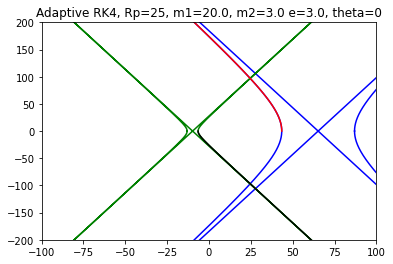

In [18]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-100,100)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor1,t,1),hyperbfns.getytheory(theta0,ecc0,semimajor1,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor0,t,-1),hyperbfns.getytheory(theta0,ecc0,semimajor0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'k')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor0,t,1),ellipsefns.getytheory(theta0,ecc0,semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor1,t,-1),ellipsefns.getytheory(theta0,ecc0,semimajor1,t,-1),'g')
#plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
#plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
#plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
#plt.axis('equal')
xth1=parabfns.getxtheory(theta0,ecc0,semimajor1,t,1)
yth1=parabfns.getytheory(theta0,ecc0,semimajor1,t,1)
xth0=parabfns.getxtheory(theta0,ecc0,semimajor0,t,-1)
yth0=parabfns.getytheory(theta0,ecc0,semimajor0,t,-1)
plt.plot(xth1,yth1,'b')
plt.plot(xth0,yth0,'g')
#plt.plot(xth1,yth1,'o')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

# RK4 Quality Tests

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [19]:
import Lstability

In [20]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,masses)
deltaL, Lavg

(4.2247752805775575e-13, -58.976782461941035)

In [21]:
deltaL*Lavg

-2.4916365267320852e-11

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [22]:
import Estability

In [23]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, masses)
deltaE, Eavg

(6.4702181025161126e-12, 1.1999999998439825)

In [24]:
deltaE*Eavg

7.764261722009868e-12

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5